In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('/Users/amulya/Desktop/Capstone/DSCI-601-Amy/Data/FeatureEngineered/AKAM_feature_engineeredv2.csv')

In [3]:
data['date'] = pd.to_datetime(data['date'])
data.sort_values('date', inplace=True)
data.reset_index(drop=True, inplace=True)


## Attempting to add Moving Average Convergence Divergence

Use closing price (PRC). Common parameters: EMA12 and EMA26, with a signal line of EMA9 of MACD.


In [4]:
data['EMA_12'] = data['PRC'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['PRC'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']
data['MACD_Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()
data['MACD_Hist'] = data['MACD'] - data['MACD_Signal']

In [5]:
data

,date,TICKER,CUSIP,COMNAM,RET,VOL_CHANGE,BA_SPREAD,ILLIQUIDITY,sprtrn,TURNOVER,...,RET_std_7d,RET_mean_14d,RET_std_14d,RET_mean_30d,RET_std_30d,EMA_12,EMA_26,MACD,MACD_Signal,MACD_Hist
0,1999-11-01,AKAM,00971T10,AKAMAI TECHNOLOGIES INC,0.200603,0.027675,0.000717,2.221163e-10,-0.006464,56.660812,...,NaN,NaN,NaN,NaN,NaN,0.531090,0.531090,0.000000,0.000000,0.000000
1,1999-11-02,AKAM,00971T10,AKAMAI TECHNOLOGIES INC,0.105773,0.061926,0.000649,1.361950e-10,-0.004712,44.062958,...,NaN,NaN,NaN,NaN,NaN,0.539766,0.535267,0.004498,0.000900,0.003599
2,1999-11-03,AKAM,00971T10,AKAMAI TECHNOLOGIES INC,-0.009728,0.021790,0.000655,-3.256651e-11,0.005335,17.114236,...,NaN,NaN,NaN,NaN,NaN,0.546224,0.538710,0.007514,0.002223,0.005292
3,1999-11-04,AKAM,00971T10,AKAMAI TECHNOLOGIES INC,-0.092338,0.087867,0.000361,-3.308900e-10,0.005690,17.614805,...,NaN,NaN,NaN,NaN,NaN,0.543396,0.537905,0.005491,0.002876,0.002615
4,1999-11-05,AKAM,00971T10,AKAMAI TECHNOLOGIES INC,0.005772,0.031662,0.000000,4.247632e-11,0.005570,8.528269,...,NaN,NaN,NaN,NaN,NaN,0.541473,0.537386,0.004087,0.003119,0.000969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,2023-12-22,AKAM,00971T10,AKAMAI TECHNOLOGIES INC,0.001088,0.058504,0.000418,9.309199e-12,0.001660,6.477677,...,0.009157,0.003114,0.004874,0.000908,0.011374,0.359237,0.352218,0.007019,0.006723,0.000296
6076,2023-12-26,AKAM,00971T10,AKAMAI TECHNOLOGIES INC,-0.001170,0.057158,0.000084,-1.370276e-11,0.004232,4.737934,...,0.009097,0.002208,0.004613,0.001362,0.011415,0.359875,0.353045,0.006830,0.006745,0.000085
6077,2023-12-27,AKAM,00971T10,AKAMAI TECHNOLOGIES INC,-0.004017,0.142502,0.000252,-3.029631e-11,0.001430,7.387060,...,0.006972,0.001536,0.005619,0.001334,0.011413,0.360189,0.353703,0.006486,0.006693,-0.000206
6078,2023-12-28,AKAM,00971T10,AKAMAI TECHNOLOGIES INC,0.000168,0.032809,0.000168,2.557893e-12,0.000370,3.658587,...,0.006935,0.002263,0.005189,0.002054,0.011267,0.360464,0.354315,0.006149,0.006584,-0.000435


Bollinger Bands (20-day window is typical; here use window=3 due to small dataset sample)


In [6]:
window_bb = 20  
data['BB_MA'] = data['PRC'].rolling(window=window_bb).mean()
data['BB_STD'] = data['PRC'].rolling(window=window_bb).std()
data['BB_Upper'] = data['BB_MA'] + 2 * data['BB_STD']
data['BB_Lower'] = data['BB_MA'] - 2 * data['BB_STD']

## Average True Range 

The Average True Range (ATR) is a technical analysis indicator that measures market volatility. It does not indicate price direction but rather the degree of price movement or volatility over a specific period.

Volatility Measurement: A higher ATR indicates increased volatility, which can help traders adjust their stop-loss orders or position sizing.
Risk Management: ATR is used to gauge whether a stock's price moves significantly relative to its usual volatility, influencing trading decisions.

In [7]:
data['True_Range'] = data['ASK'] - data['BID']  
window_atr = 14
data['ATR'] = data['True_Range'].rolling(window=window_atr).mean()


In [9]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,6070,6071,6072,6073,6074,6075,6076,6077,6078,6079
date,1999-11-01 00:00:00,1999-11-02 00:00:00,1999-11-03 00:00:00,1999-11-04 00:00:00,1999-11-05 00:00:00,1999-11-08 00:00:00,1999-11-09 00:00:00,1999-11-10 00:00:00,1999-11-11 00:00:00,1999-11-12 00:00:00,...,2023-12-15 00:00:00,2023-12-18 00:00:00,2023-12-19 00:00:00,2023-12-20 00:00:00,2023-12-21 00:00:00,2023-12-22 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00
TICKER,AKAM,AKAM,AKAM,AKAM,AKAM,AKAM,AKAM,AKAM,AKAM,AKAM,...,AKAM,AKAM,AKAM,AKAM,AKAM,AKAM,AKAM,AKAM,AKAM,AKAM
CUSIP,00971T10,00971T10,00971T10,00971T10,00971T10,00971T10,00971T10,00971T10,00971T10,00971T10,...,00971T10,00971T10,00971T10,00971T10,00971T10,00971T10,00971T10,00971T10,00971T10,00971T10
COMNAM,AKAMAI TECHNOLOGIES INC,AKAMAI TECHNOLOGIES INC,AKAMAI TECHNOLOGIES INC,AKAMAI TECHNOLOGIES INC,AKAMAI TECHNOLOGIES INC,AKAMAI TECHNOLOGIES INC,AKAMAI TECHNOLOGIES INC,AKAMAI TECHNOLOGIES INC,AKAMAI TECHNOLOGIES INC,AKAMAI TECHNOLOGIES INC,...,AKAMAI TECHNOLOGIES INC,AKAMAI TECHNOLOGIES INC,AKAMAI TECHNOLOGIES INC,AKAMAI TECHNOLOGIES INC,AKAMAI TECHNOLOGIES INC,AKAMAI TECHNOLOGIES INC,AKAMAI TECHNOLOGIES INC,AKAMAI TECHNOLOGIES INC,AKAMAI TECHNOLOGIES INC,AKAMAI TECHNOLOGIES INC
RET,0.200603,0.105773,-0.009728,-0.092338,0.005772,0.076399,0.011663,0.001318,-0.041118,-0.026758,...,0.006845,0.006715,0.002001,-0.006823,0.001089,0.001088,-0.00117,-0.004017,0.000168,-0.005629
VOL_CHANGE,0.027675,0.061926,0.02179,0.087867,0.031662,0.118355,0.036146,0.065508,0.068113,0.065251,...,0.101484,0.020272,0.127543,0.046132,0.124193,0.058504,0.057158,0.142502,0.032809,0.123205
BA_SPREAD,0.000717,0.000649,0.000655,0.000361,0.0,0.006664,0.003294,0.002632,0.008919,0.002467,...,0.000168,0.000334,0.00025,0.000335,0.000084,0.000418,0.000084,0.000252,0.000168,0.000253
ILLIQUIDITY,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,...,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0
sprtrn,-0.006464,-0.004712,0.005335,0.00569,0.00557,0.004948,-0.008518,0.005991,0.005825,0.010569,...,-0.000076,0.004528,0.005866,-0.014684,0.010301,0.00166,0.004232,0.00143,0.00037,-0.002826
TURNOVER,56.660812,44.062958,17.114236,17.614805,8.528269,11.299414,5.961987,4.843518,4.057249,3.286017,...,19.085976,7.132081,10.085075,6.297967,8.700998,6.477677,4.737934,7.38706,3.658587,5.019479


## Drawdown from Cumulative Returns

Drawdown is a measure of the decline in value from a peak to a trough over a specific period. It represents the maximum loss an investment or trading strategy experiences from its highest historical value before a new peak is achieved.

Risk Assessment: Drawdown helps assess the risk by quantifying the worst loss encountered during a period.
Strategy Evaluation: It is particularly useful in evaluating trading strategies, as a strategy with lower drawdowns is generally preferred even if the returns are similar.

In [10]:
data['Cumulative_Portfolio'] = (1 + data['RET']).cumprod()
data['Cumulative_Max'] = data['Cumulative_Portfolio'].cummax()
data['Drawdown'] = data['Cumulative_Portfolio'] - data['Cumulative_Max']


## Feature Importance

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Assume 'df' is your DataFrame with features and target 'RET'
features = data[['VOL_CHANGE', 'BA_SPREAD', 'ILLIQUIDITY', 'sprtrn', 'TURNOVER', 'PRC']]
target = data['RET']

# Train a RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(features, target)

# Extract and display feature importances
importances = rf_model.feature_importances_
feature_names = features.columns

for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")


VOL_CHANGE: 0.1364
BA_SPREAD: 0.1727
ILLIQUIDITY: 0.0037
sprtrn: 0.2919
TURNOVER: 0.2276
PRC: 0.1678


Random Forest Feature Importances:
        Feature  Importance
8           RSI    0.306296
6    RET_ema_12    0.280728
3        sprtrn    0.096764
0    VOL_CHANGE    0.057064
9           OBV    0.049886
4      TURNOVER    0.047085
10    RET_lag_1    0.033898
12   RET_std_7d    0.028522
1     BA_SPREAD    0.027348
11  RET_mean_7d    0.027040
7    RET_ema_26    0.025233
5           PRC    0.019127
2   ILLIQUIDITY    0.001009

Permutation Feature Importances:
        Feature  Importance
8           RSI    0.654648
6    RET_ema_12    0.446177
3        sprtrn    0.213191
9           OBV    0.082464
0    VOL_CHANGE    0.076203
4      TURNOVER    0.066486
10    RET_lag_1    0.037944
12   RET_std_7d    0.029570
7    RET_ema_26    0.029523
11  RET_mean_7d    0.025841
1     BA_SPREAD    0.022978
5           PRC    0.018239
2   ILLIQUIDITY    0.000557


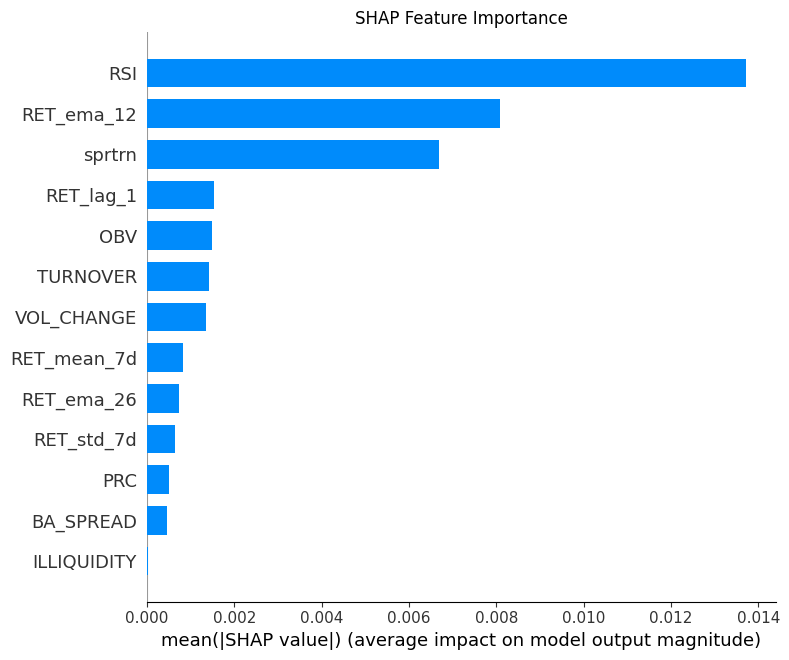

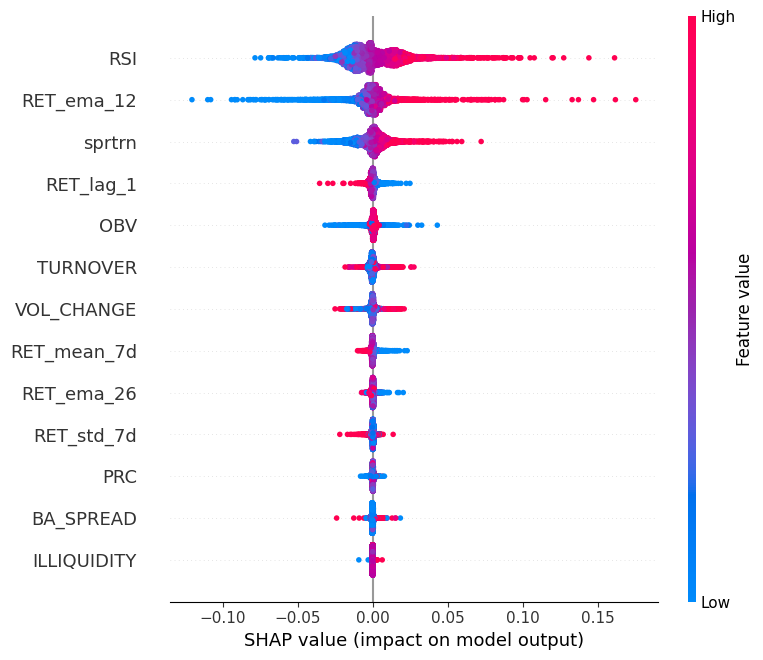

In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
import matplotlib.pyplot as plt



# Define target and feature columns.
# Adjust this list to include the advanced features you want to evaluate.
feature_cols = [
    'VOL_CHANGE', 'BA_SPREAD', 'ILLIQUIDITY', 'sprtrn', 'TURNOVER', 'PRC', 
    'RET_ema_12', 'RET_ema_26', 'RSI', 'OBV', 'RET_lag_1', 
    'RET_mean_7d', 'RET_std_7d'
]
target_col = 'RET'

# Ensure there are no missing values for these columns
df = data.dropna(subset=feature_cols + [target_col])

# Prepare features (X) and target (y)
X = df[feature_cols]
y = df[target_col]

### 1. Tree-Based Feature Importance using RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)
rf_importances = rf_model.feature_importances_

# Display the feature importances
rf_importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)
print("Random Forest Feature Importances:")
print(rf_importance_df)

### 2. Permutation Importance
perm_importance = permutation_importance(rf_model, X, y, n_repeats=10, random_state=42)
perm_importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)
print("\nPermutation Feature Importances:")
print(perm_importance_df)

### 3. SHAP Values for Global Feature Importance
# Create a SHAP explainer based on the tree model
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X)

# Summary plot for global feature importance
shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title("SHAP Feature Importance")
plt.tight_layout()
plt.show()

# For a more detailed summary (beeswarm plot), you can also call:
shap.summary_plot(shap_values, X)


# References

Pardo, R. (2008). The Evaluation and Optimization of Trading Strategies. Wiley Trading.

